In [1]:
# I resolved the task for two cases: daily and total amount of searches for the the keyword with rank 1 receive for each search engine.

# Download libraries I will use.

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

# Download the main dataset.

path = '/content/' #can be changed

df = pd.read_csv(path+'case_study_junior_ds (1).csv')
display(df.head(), df.shape)

,keyword_id,keyword_rank,date,searches,search_engine
0,338145,25218,2022-07-08,53000,0
1,366846,906743,2022-07-08,0,0
2,8590017696,136761,2022-07-08,7000,0
3,8590268435,60380,2022-07-08,20033,0
4,17179954797,239930,2022-07-08,2000,0


(469308, 5)

In [2]:
# Data overwiew. Research data types, statistic, if there are nan values. Check for duplicate values in dataset.

display(df.describe(), df.info(), df.isna().sum(), df.duplicated().unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469308 entries, 0 to 469307
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   keyword_id     469308 non-null  int64 
 1   keyword_rank   469308 non-null  int64 
 2   date           469308 non-null  object
 3   searches       469308 non-null  int64 
 4   search_engine  469308 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 17.9+ MB


,keyword_id,keyword_rank,searches,search_engine
count,4.693080e+05,4.693080e+05,4.693080e+05,469308.000000
mean,1.955014e+12,7.439009e+05,8.550373e+03,6.818188
std,1.290018e+12,1.388063e+06,8.279563e+04,5.185202
min,5.850000e+03,3.000000e+00,0.000000e+00,0.000000
25%,7.988642e+11,7.421850e+04,0.000000e+00,3.000000
50%,1.838246e+12,2.360955e+05,0.000000e+00,5.000000
75%,3.049427e+12,7.821010e+05,3.000000e+03,10.000000
max,4.389457e+12,1.391182e+07,1.863716e+07,25.000000


None

keyword_id       0
keyword_rank     0
date             0
searches         0
search_engine    0
dtype: int64

array([False])

 Conclusions: there are no nan values, there are no duplicated rows.


In [3]:
# First of all I will check if there is keyword_rank = 1.

if len(df[df['keyword_rank']==1])==0:
  print('There is no keyword_rank = 1 in our dataset. So I will need to continue analysing the dataset, define the problem and find the solution.')

There is no keyword_rank = 1 in our dataset. So I will need to continue analysing the dataset, define the problem and find the solution.


,keyword_id,keyword_rank,searches
keyword_id,1.000000,0.148457,-0.137877
keyword_rank,0.148457,1.000000,-0.144322
searches,-0.137877,-0.144322,1.000000


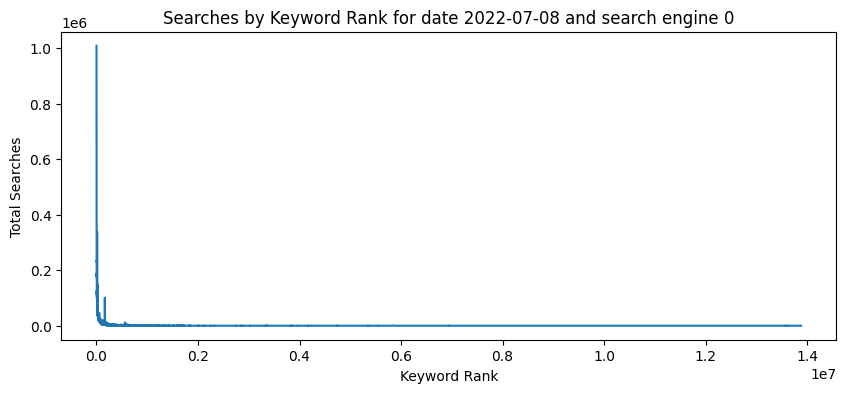

,keyword_id,keyword_rank,searches
keyword_id,1.000000,0.140183,-0.122336
keyword_rank,0.140183,1.000000,-0.148908
searches,-0.122336,-0.148908,1.000000


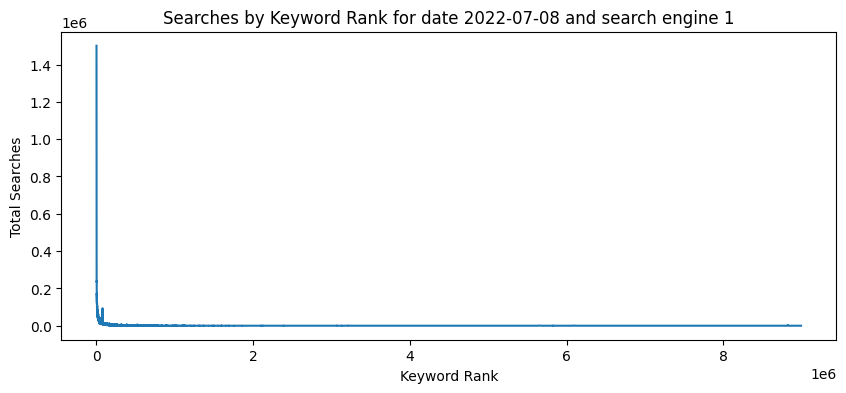

,keyword_id,keyword_rank,searches
keyword_id,1.000000,0.124660,-0.129977
keyword_rank,0.124660,1.000000,-0.140685
searches,-0.129977,-0.140685,1.000000


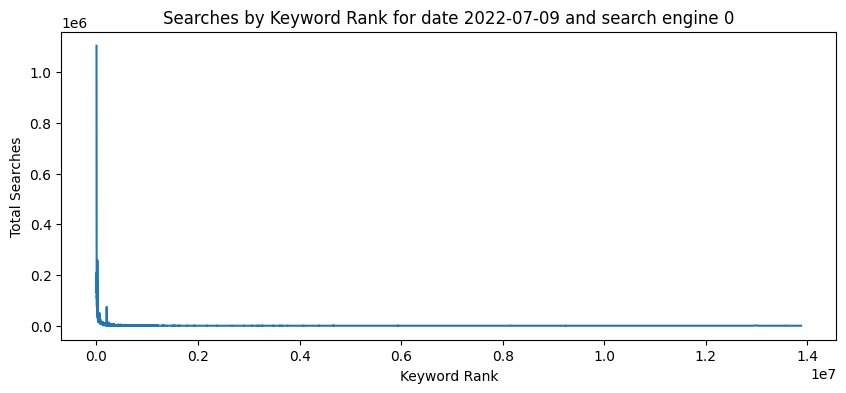

,keyword_id,keyword_rank,searches
keyword_id,1.000000,0.143551,-0.118576
keyword_rank,0.143551,1.000000,-0.146496
searches,-0.118576,-0.146496,1.000000


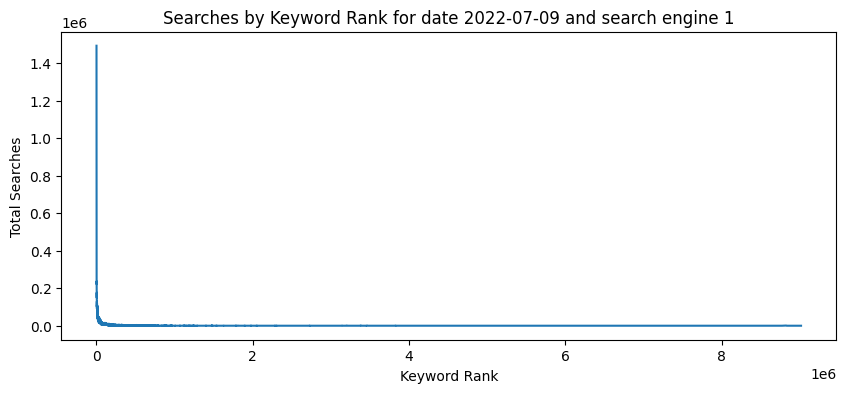

In [4]:
# Visualization of part of the dataset, depending on the day and search_engine, to visually test the condition that there is an inverse relationship between the number of searches during the day and the keyword rank.
# I will check correlation, and draw four line plots for visual inspection.

for i in df['date'].unique()[:2]:
  for j in df['search_engine'].unique()[:2]:
    d = str(i)
    engine = j

    df_tmp = df[(df['date']==str(d))&(df['search_engine']==engine)][['keyword_id','keyword_rank','searches']].copy()

    # Check correlation between keyword_id, keyword_rank and searches

    display(df_tmp.corr())

    df_tmp = df_tmp.sort_values(by='keyword_rank')

    # Create a line plot
    # Set the figure size

    plt.figure(figsize=(10, 4))
    plt.plot(df_tmp['keyword_rank'], df_tmp['searches'])
    plt.title('Searches by Keyword Rank for date '+str(d)+' and search engine '+str(engine))
    plt.xlabel('Keyword Rank')
    plt.ylabel('Total Searches')
    plt.show()

From the correlation matrix we can see that there is no correlation between keyword_id, keyword_rank and searches during one day;
the line on the graph is not a non-increasing line and we do not see obvious inverse relationship between searches and keyword_rank during one day.

,keyword_id,keyword_rank,search_engine,searches
keyword_id,1.000000,0.011311,NaN,-0.044290
keyword_rank,0.011311,1.000000,NaN,-0.254625
search_engine,NaN,NaN,NaN,NaN
searches,-0.044290,-0.254625,NaN,1.000000


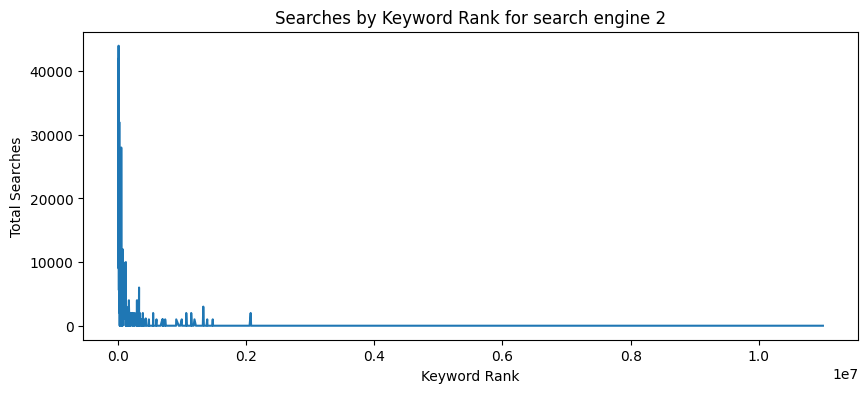

In [5]:
# Visualization of part of the dataset, depending on the search_engine, to visually test the condition that there is an inverse relationship between the number of searches and the keyword rank.
# I will check correlation, and draw two line plots for visual inspection.

df_total = df.groupby(['keyword_id','keyword_rank','search_engine'])['searches'].sum().reset_index()

for engine in df_total['search_engine'].unique()[:1]:
  df_tmp = df_total[df_total['search_engine']==engine].copy()

  # Check correlation between keyword_id, keyword_rank and searches

  display(df_tmp.corr())

  df_tmp = df_tmp.sort_values(by='keyword_rank')

  # Create a line plot
  # Set the figure size

  plt.figure(figsize=(10, 4))
  plt.plot(df_tmp['keyword_rank'], df_tmp['searches'])
  plt.title('Searches by Keyword Rank for search engine '+str(engine))
  plt.xlabel('Keyword Rank')
  plt.ylabel('Total Searches')
  plt.show()

From the correlation matrix we can see that there is no correlation between keyword_id, keyword_rank and searches during the whole measurement period;
the line on the graph is not smooth and we do not see obvious inverse relationship between searches and keyword_rank

,keyword_id,keyword_rank,searches
keyword_id,1.000000,0.051936,-0.077841
keyword_rank,0.051936,1.000000,-0.088556
searches,-0.077841,-0.088556,1.000000


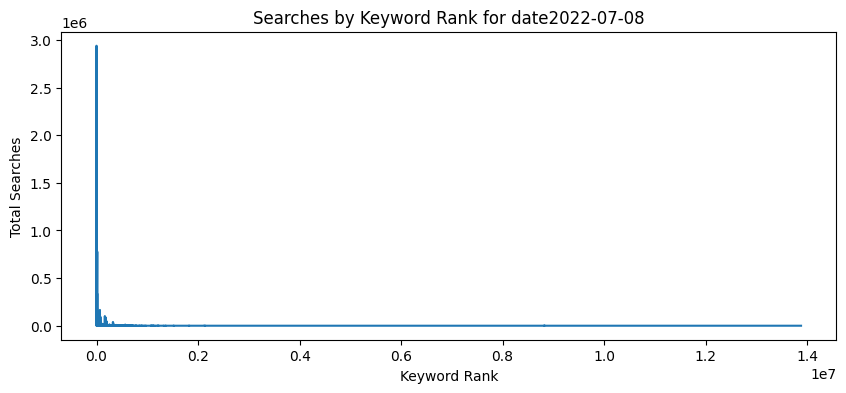

,keyword_id,keyword_rank,searches
keyword_id,1.000000,0.050884,-0.077753
keyword_rank,0.050884,1.000000,-0.091947
searches,-0.077753,-0.091947,1.000000


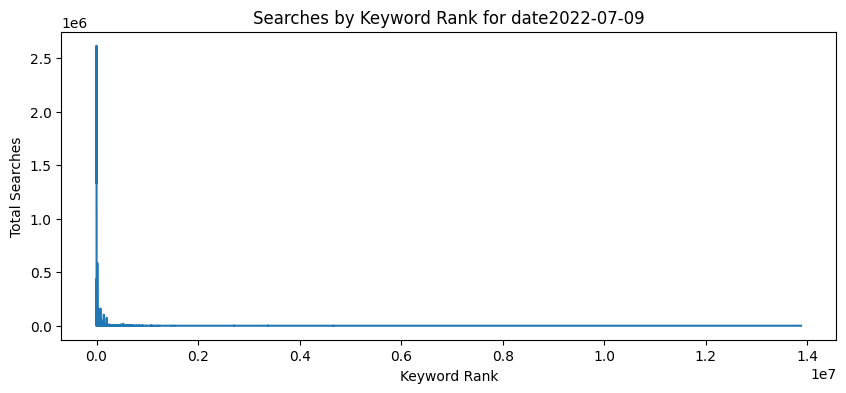

In [6]:
# Visualization of part of the dataset, depending on the date, to visually test the condition that there is an inverse relationship between the number of searches during the day and the keyword rank.
# I will check correlation, draw two line plots for visual inspection.

df_dates = df.groupby(['date','keyword_id','keyword_rank'])['searches'].sum().reset_index()

for d in df_dates['date'].unique()[:2]:
  df_tmp = df_dates[df_dates['date']==d].copy()

  # Check correlation between keyword_id, keyword_rank and searches

  display(df_tmp.corr(numeric_only = True))

  df_tmp = df_tmp.sort_values(by='keyword_rank')

  # Create a line plot
  # Set the figure size

  plt.figure(figsize=(10, 4))
  plt.plot(df_tmp['keyword_rank'], df_tmp['searches'])
  plt.title('Searches by Keyword Rank for date'+str(d))
  plt.xlabel('Keyword Rank')
  plt.ylabel('Total Searches')
  plt.show()

From the correlation matrix we can see that there is no correlation between keyword_id, keyword_rank and searches during the whole measurement period; the line on the graph is not smooth and we do not see obvious inverse relationship between searches during the day and keyword_rank



In [7]:
# Check if the keywords, identified by their keyword_id, are ranked from most to least searched.
# I will create a new dataframe called "df_new" which will consist data for only one date and one search_engine taken from the main dataframe.
# For example, I will take date = 2022-07-10 and search_engine = 8.

d = '2022-07-10'
engine = 8

df_new = df[(df['date']==str(d))&(df['search_engine']==engine)].sort_values(by='keyword_rank').reset_index(drop=True).copy()

# After sorting the datafraim by keyword_rank	in ascending order I will create a new column called "searches_diff" which will contain the difference of a searches element compared with a searches element in previous row.
# I will mark 1 in other new column called "check" if the amount of searches in a certain keyword_rank has became lower compared to the amount of searches in a previous row where the keyword_rank was lower or stayed the same, and 0 in other case.
# Finally I will filter 0 values in a columnn "check" and will calculate the amount. If the amount of them are more than 0, then I can make a conclusion that the keyword_rank in our main dataset were made not correct.

df_new['searches_diff'] = df_new['searches'].diff()
df_new['check'] = df_new["searches_diff"]<=0

display(df_new.head(), df_new.shape)

if len(df_new[df_new['check']==False].iloc[1:])>0:
  print('The keyword_rank is not valid as it was correctly made by definition. The amount of wrong ranked elements are '+str(round(100*len(df_new[df_new['check']==0])/len(df_new),2))+'%')
else:
  print('The keywords, identified by their keyword_id, are ranked from most to least searched in a colunm named "keyword_rank"')

,keyword_id,keyword_rank,date,searches,search_engine,searches_diff,check
0,1606317975332,12,2022-07-10,1807732,8,NaN,False
1,841813784782,106,2022-07-10,675521,8,-1132211.0,True
2,1391569477594,186,2022-07-10,466230,8,-209291.0,True
3,128849123142,200,2022-07-10,634715,8,168485.0,False
4,85899575914,201,2022-07-10,517239,8,-117476.0,True


(3269, 7)

The keyword_rank is not valid as it was correctly made by definition. The amount of wrong ranked elements are 22.79%


Conclusion: by definition the keyword_rank and number of searches must be inversely related, and here we see that this is not true.

In [8]:
# My solution for the task: receive the amount of daily and total searches which the keyword with rank 1 receive for each search engine.
# I will create a new custom keyword rank for both cases.
# I will take the same date = 2022-07-10 and search_engine = 8 as before to check if the custom keywords, identified by their keyword_id, are ranked from most to least searched.

col_name = 'custom_keyword_rank'
d = '2022-07-10'
engine = 8

In [9]:
# Daily searches:

df[str(col_name)] = df.groupby(['date','search_engine'])['searches'].rank('dense',ascending=False)

df_new = df[(df['date']==str(d))&(df['search_engine']==engine)].sort_values(by=str(col_name)).reset_index(drop=True).copy()
df_new['searches_diff'] = df_new['searches'].diff()
df_new['check'] = df_new.apply(lambda x: 1 if x['searches_diff']<=0 else 0, axis=1)

display(df_new.head(), df_new.shape)

if len(df_new[df_new['check']==0].iloc[1:])>0:
  print('The keyword_rank is not correct. The amount of wrong ranked elements are '+str(round(100*len(df_new[df_new['check']==0])/len(df_new),2))+'%')
else:
  print('The keywords, identified by their keyword_id, are ranked from most to least searched in a colunm named "'+str(col_name)+'"')
  daily_result = df[df[str(col_name)] == 1].drop(columns='keyword_rank').reset_index(drop=True).copy()
  daily_result.to_csv(path+'daily_results_case_study_junior_ds.csv')
  display(daily_result)

,keyword_id,keyword_rank,date,searches,search_engine,custom_keyword_rank,searches_diff,check
0,1606317975332,12,2022-07-10,1807732,8,1.0,NaN,0
1,841813784782,106,2022-07-10,675521,8,2.0,-1132211.0,1
2,128849123142,200,2022-07-10,634715,8,3.0,-40806.0,1
3,85899575914,201,2022-07-10,517239,8,4.0,-117476.0,1
4,1391569477594,186,2022-07-10,466230,8,5.0,-51009.0,1


(3269, 8)

The keywords, identified by their keyword_id, are ranked from most to least searched in a colunm named "custom_keyword_rank"


,keyword_id,date,searches,search_engine,custom_keyword_rank
0,107796,2022-07-08,1008250,0,1.0
1,107796,2022-07-09,1103841,0,1.0
2,283468093540,2022-07-10,4083115,0,1.0
3,283468093540,2022-07-11,3508972,0,1.0
4,107796,2022-07-12,948289,0,1.0
...,...,...,...,...,...
178,3212635610681,2022-07-10,5180843,25,1.0
179,3212635610681,2022-07-11,3996588,25,1.0
180,128849280226,2022-07-12,348342,25,1.0
181,128849280226,2022-07-13,346011,25,1.0


Result. The amount of searches the keyword with rank 1 receive for each search engine (column called "search_engine") daily (column called "date") is defined in a column "searches" in dataframe called "daily_result".


As a final step for daily results I will check what persentage of keyword_ids with the highest number of searches which were indified by me in a new column "custom_keyword_rank" with: rank 1 match the initial keyword_ids with the highest number of searches identified with the lowest rank from column "keyword_rank" in the group.


In [10]:
# I will add two columns taken from initial dataset, which will show the number of searches and keyword_id of a top ranked keywords for each uniue date and search_engine.
# Then I will compare them with what I received after making custom_keyword_rank.

daily_result['top_keyword_id_original'] = np.nan
daily_result['top_searches_num'] = np.nan
for i in range(0,len(daily_result)):
  d = daily_result.loc[i, 'date']
  engine = daily_result.loc[i, 'search_engine']
  min_rank = df[(df['date']==d)&(df['search_engine']==engine)]['keyword_rank'].min()
  daily_result.loc[i, 'top_keyword_id_original'] = df[(df['keyword_rank']==min_rank)]['keyword_id'].values[0]
  daily_result.loc[i, 'top_searches_num'] = df[(df['keyword_rank']==min_rank)]['searches'].values[0]

daily_result['check_keyword_id'] = daily_result['keyword_id']==daily_result['top_keyword_id_original']
daily_result['check_searches_num'] = daily_result['searches']==daily_result['top_searches_num']

display(daily_result.head(),daily_result.tail(), daily_result.shape)

p = round(len(daily_result[daily_result['check_keyword_id']==True])*100/len(daily_result['check_keyword_id']),2)
if p<80:
  print('The percentage of correctly identified initial ranks is '+str(p)+'%. So the initial keyword_rank column was not valid.')
else:
  print('The percentage of correctly identified initial ranks is '+str(p)+'%. So the initial keyword_rank column was roughly valid as well.')

,keyword_id,date,searches,search_engine,custom_keyword_rank,top_keyword_id_original,top_searches_num,check_keyword_id,check_searches_num
0,107796,2022-07-08,1008250,0,1.0,1.077960e+05,1008250.0,True,True
1,107796,2022-07-09,1103841,0,1.0,1.077960e+05,1103841.0,True,True
2,283468093540,2022-07-10,4083115,0,1.0,2.834681e+11,4083115.0,True,True
3,283468093540,2022-07-11,3508972,0,1.0,2.834681e+11,3508972.0,True,True
4,107796,2022-07-12,948289,0,1.0,2.834681e+11,437936.0,False,False


,keyword_id,date,searches,search_engine,custom_keyword_rank,top_keyword_id_original,top_searches_num,check_keyword_id,check_searches_num
178,3212635610681,2022-07-10,5180843,25,1.0,1.606318e+12,1788743.0,False,False
179,3212635610681,2022-07-11,3996588,25,1.0,3.212636e+12,3996588.0,True,True
180,128849280226,2022-07-12,348342,25,1.0,3.985730e+12,3430634.0,False,False
181,128849280226,2022-07-13,346011,25,1.0,9.105334e+11,2713843.0,False,False
182,128849280226,2022-07-14,327883,25,1.0,3.212636e+12,323792.0,False,False


(183, 9)

The percentage of correctly identified initial ranks is 37.16%. So the initial keyword_rank column was not valid.


Let's say we will need to define the amount of searches the keyword with rank 1 receive for each search engine during the whole period. Then I will do next:

In [11]:
# Total searches:

col_name = 'custom_keyword_rank'
engine = 8

df_total = df.groupby(['keyword_id','search_engine'])['searches'].sum().reset_index()
df_total[str(col_name)] = df_total.groupby('search_engine')['searches'].rank('dense',ascending=False)

df_new = df_total[(df_total['search_engine']==engine)].sort_values(by=str(col_name)).reset_index(drop=True).copy()
df_new['searches_diff'] = df_new['searches'].diff()
df_new['check'] = df_new.apply(lambda x: 1 if x['searches_diff']<=0 else 0, axis=1)

if len(df_new[df_new['check']==0].iloc[1:])>0:
  print('The keyword_rank is not correct. The amount of wrong ranked elements are '+str(round(100*len(df_new[df_new['check']==0])/len(df_new),2))+'%')
else:
  print('The keywords, identified by their keyword_id, are ranked from most to least searched in a colunm named "'+str(col_name)+'"')
  result = df_total[df_total[str(col_name)] == 1].sort_values(by='search_engine').copy()
  result.to_csv(path+'total_results_case_study_junior_ds.csv')
  display(result)

The keywords, identified by their keyword_id, are ranked from most to least searched in a colunm named "custom_keyword_rank"


,keyword_id,search_engine,searches,custom_keyword_rank
9627,283468093540,0,9512016,1.0
22380,704374905883,1,19481897,1.0
17156,532575953139,2,92000,1.0
103954,4148938482137,3,3478171,1.0
10519,309238066050,4,8062389,1.0
18532,575525711518,5,5158211,1.0
32723,1073742334476,6,33569733,1.0
12342,369367302479,7,8880784,1.0
46356,1606317975332,8,9485243,1.0
33123,1090922017637,9,6259970,1.0


Result. The amount of searches the keyword with rank 1 receive for each search engine (column called "search_engine") is defined in a column "searches" in dataframe called "result".


In [12]:
# Resolved.